In [221]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import warnings
import numpy as np
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

directory = os.fsencode("eduproject_data")
df_data_list = []
df_users_list = []
df_media_list = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".json"):
        json_file = open(os.path.join(directory.decode("utf-8"), str(filename)), encoding="utf8")
        data = json.load(json_file)
        df_data = pd.DataFrame(data['data'])
        df_users = pd.DataFrame(data['includes']['users'])
        df_media = pd.DataFrame(data['includes']['media'])
        df_data_list.append(df_data)
        df_users_list.append(df_users)
        df_media_list.append(df_media)
        
df_data_all = pd.concat(df_data_list, ignore_index=True)
df_users_all = pd.concat(df_users_list, ignore_index=True)
df_media_all = pd.concat(df_media_list, ignore_index=True)

df_all = pd.merge(df_data_all,df_users_all, left_on='author_id', right_on='id', how='left')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

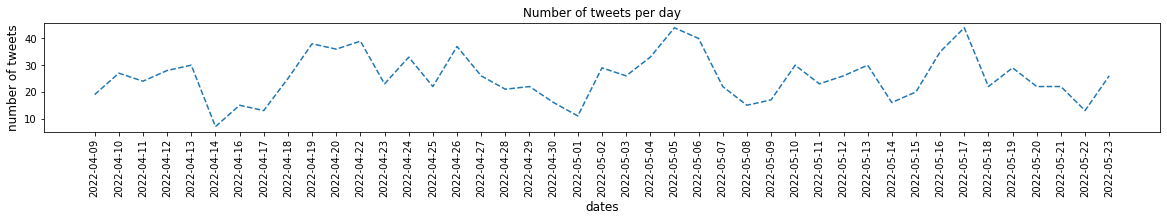

In [295]:
#Tweets per day (time series)
#First we remove duplicates by id_x and conversation_id
df_all_no_duplicates = df_all.drop_duplicates(subset=["conversation_id","id_x"])
df_all_no_duplicates_sorted = df_all_no_duplicates.sort_values(by="created_at")
dates = [x.split('T')[0] for x in list(df_all_no_duplicates_sorted.created_at)]
from collections import Counter
dates = dict(Counter(dates))
dates_x = dates.keys()
dates_y = dates.values()
dates_x= dates_x
dates_y = dates_y
fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
plt.plot_date(dates_x, dates_y, '--')
plt.title('Number of tweets per day')
plt.xlabel('dates', fontsize = 12)
plt.ylabel('number of tweets', fontsize = 12)
plt.xticks(rotation=90)

In [297]:
#Tweets per person ranking
#Histogram: Another idea, being x the number of tweets, and y the % of users that have that number of tweets
df_all_no_duplicates.value_counts(subset=['username', 'name']).head(30)

username         name                                              
llume38          Luis de Mena                                          133
srviruel         Sergio Ruiz Viruel                                     45
ladeidiomas      Jimena 🇪🇸🇬🇧🇩🇪🇫🇷🇮🇹🇧🇷🇷🇺 #TVTTagTeam 🦩                    40
edpuzzle_es      Edpuzzle (español)                                     28
abeorquin        Abe Orquín                                             26
agr_psp_iplacex  Agrupación Estudiantes Psicopedagogía Online           25
vicentgadea      Vicent Gadea                                           22
imgende          Ingrid Mosquera                                        21
rosaliarte       Rosa Liarte Alcaine                                    21
ProfeCarlos67    Carlos Espinoza R. #SoyProfesor - #claustrovirtual     20
manueljesusF     Manuel Jesús Fernández                                 19
123eraseunavez   Cuentitis Crónica                                      19
area44cp         Área 44 Servici

In [266]:
#Retweets per person ranking
#Histogram, use hist
df_all_no_duplicates['retweet_count'] = df_all_no_duplicates['public_metrics'].apply(lambda x: x.get('retweet_count', None))
df_all_no_duplicates.groupby("username")["retweet_count"].apply(lambda x: x.sum()).sort_values(ascending=False).head(30)

username
vicentgadea        236
llume38            142
edpuzzle_es        140
manueljesusF       119
AzaharaTIC         107
gustavolorente1     91
genially_es         88
EliaZapico          71
Mariaglezben        70
srviruel            66
Mustriasm           60
abeorquin           56
rosaliarte          52
Hiperdocumentos     50
educahistoria       48
antonio_td9         46
NimoLearn           43
ladeidiomas         41
miguealvm           40
clasehistoria79     34
marianiabe          34
svalenciaga         33
VictorArufe         30
MicrosoftEduEsp     29
OrtegahOrtega       29
GmedranoTIC         28
UtopoLibre          26
JUNIOResp_es        24
MaitechuALandia     24
GoldenmacEDU        24
Name: retweet_count, dtype: int64

In [351]:
#Likes per person ranking
df_all_no_duplicates['like_count'] = df_all_no_duplicates['public_metrics'].apply(lambda x: x.get('like_count', None))
df_all_no_duplicates.groupby("username")["like_count"].apply(lambda x: x.sum()).sort_values(ascending=False).head(30)

username
llume38            1001
vicentgadea         770
gustavolorente1     689
EliaZapico          611
edpuzzle_es         420
manueljesusF        297
doloresojeda1       277
AzaharaTIC          265
ladeidiomas         262
rosaliarte          232
genially_es         212
srviruel            191
clasehistoria79     190
NimoLearn           172
Mariaglezben        150
Mustriasm           147
svalenciaga         132
antonio_td9         129
VictorArufe         126
Hiperdocumentos     114
Paulaticher         108
abeorquin           106
ProfeCarlos67       103
miguealvm           103
educahistoria       101
marianiabe           95
OrtegahOrtega        94
Agusxavi8            94
imgende              93
GmedranoTIC          89
Name: like_count, dtype: int64

In [318]:
#Number and name of related hashtags
import unicodedata
hashtags=df_all_no_duplicates["entities"].apply(lambda x: x.get('hashtags', None))
hashtags_df = pd.DataFrame.from_dict(hashtags)
hashtags_df = [[d.get("tag") for d in x] for x in hashtags_df["entities"]]
hashtags_all = sum(hashtags_df, [])
hashtags_all_formatted = [] 
for hashtag in hashtags_all:
    hashtag_no_accent = unicodedata.normalize('NFD', hashtag).encode('ascii', 'ignore').decode("utf-8")
    hashtags_all_formatted.append(hashtag_no_accent.lower())
    
hashtag_count = pd.DataFrame(hashtags_all_formatted)
hashtag_count = hashtag_count.value_counts()
hashtag_count.head(30)


claustrovirtual       1100
educacion              147
psicopedagogia          63
pedagogia               58
docentes                47
mfltwitterati           37
edutwitter              36
edtech                  35
maestros                33
maestro                 31
profesores              31
edchats                 30
teacher5oclockclub      30
docente                 29
profesor                29
edpuzzle                26
ensenandocontic         26
teachers                26
edufis                  25
abj                     25
edurecetas              24
hashtags                21
microsoftedu            21
charlaseducativas       21
unitedteachers          21
podcast                 20
inclusioneducativa      20
gamificacion            19
zamora                  17
librosrecomendados      16
dtype: int64

In [282]:
#Most retweeted tweets
df_all_no_duplicates[["username","retweet_count","text"]].sort_values(by="retweet_count", ascending=False).head(30)

,username,retweet_count,text
9330,AzaharaTIC,89,Herramienta digital para crear vídeos con voz realista a partir de texto. #Vídeo #Audio #Claustrovirtual 📽️🔉 https://t.co/51MCNtG086
6624,vicentgadea,67,"Existen multitud de herramientas 🛠️ que nos permiten crear recursos digitales 💻📱para nuestro alumnado. \n\nHoy os comparto mi ""Top 10 apps para crear fichas y actividades interactivas"" 👇 https://t.co/Xx3vsQV8q0\n\n¿Cuál es tu favorita? 🤔\n\n#claustrovirtual #edtech https://t.co/DnW01odeKM"
4393,Mustriasm,60,Hace un mes pedí ayuda al #ClaustroVirtual con unas dudas sobre Genially. Gracias a @imgende @ProfeDe_ELE_DAF @fernando_marti7 @AlicitaTF y @PDuchement di forma a un taller sobre uso seguro de TIC en 5º y 6º de EP y aquí está para quien lo quiera usar⬇️
7546,antonio_td9,34,"Comparto cap. 7 ""Buscando a Ash"". Hemos liberado al profesor Oak con ayuda de nuevos amigos. Trabajamos en @MaristasMalaga Lengua: r fuerte/suave, c/qu, diminutivos/aumentativos y el verbo. Reutilizable 👇 #claustrovirtual #edurecetas #masqueaulas https://t.co/0Mah89ijbm https://t.co/vR1alQ00Ey"
13422,Hiperdocumentos,33,#HiperDocTip de la semana🤩\n¡Las notas de #audio han llegado para quedarse! ¿Has probado a instalar 📲🎙@justmoteHQ? \nTe contamos por qué y para qué lo necesitas🤔👇🏽 #edtech #claustrovirtual @GEGSpain @GoogleForEdu https://t.co/2i7dIYZOom
10429,miguealvm,33,#claustrovirtual @imgende . Dejo un pequeño hilo sobre tips de seguridad que yo suelo utilizar para navegar por internet y hacerlo de una manera más segura y anónima por si os pueden ser de utilidad.
3489,vicentgadea,32,En este mini-truco aprenderás a dividir un documento Word en dos ventanas. Muy útil cuando trabajamos con documentos de gran extensión 📄/📃\n\nYoutube 📺👇\nhttps://t.co/FsujfaDNtL\n\nTik Tok 📱👇\nhttps://t.co/Faf4kUeYOR\n\n#edtech #claustrovirtual #trickVG #MicrosoftEDU https://t.co/AoWsH3W2d3
4870,MicrosoftEduEsp,29,"🔴ATENCIÓN COMUNIDAD EDUCATIVA\n\nEl próximo 15 de mayo, se abren las puertas para las nominaciones #MIEExpert ¡No te pierdas esta oportunidad única de formar parte de una gran comunidad!✨\n\nToda la información aquí👇 https://t.co/vDdAwaYitQ\n\n#MicrosoftEDU #claustrovirtual https://t.co/q0WqrADBT2"
3629,svalenciaga,26,Comparto dos truquitos molones que me encantan de @canva 🤗 por si os pueden servir🤗y además os deseo a todo el #claustrovirtual una super HAPPY EASTER WEEK😘\n👇kit de marca👇bitmoji👇 https://t.co/soWAxa1KR5
11938,vicentgadea,24,En este micro-truco aprenderás a añadir una imagen de fondo en un documento Word 🖼️📄\n\nYoutube 📺👇\nhttps://t.co/sthv6LQlbF\n\nTik Tok 📱👇\nhttps://t.co/YS7rbUGC3z\n\n#claustrovirtual #trickVG #edtech https://t.co/EgM3DVwm6N


In [319]:
#Most liked tweets
df_all_no_duplicates[["username","like_count","text"]].sort_values(by="like_count", ascending=False).head(30)


,username,like_count,text
9330,AzaharaTIC,220,Herramienta digital para crear vídeos con voz realista a partir de texto. #Vídeo #Audio #Claustrovirtual 📽️🔉 https://t.co/51MCNtG086
6624,vicentgadea,192,"Existen multitud de herramientas 🛠️ que nos permiten crear recursos digitales 💻📱para nuestro alumnado. \n\nHoy os comparto mi ""Top 10 apps para crear fichas y actividades interactivas"" 👇 https://t.co/Xx3vsQV8q0\n\n¿Cuál es tu favorita? 🤔\n\n#claustrovirtual #edtech https://t.co/DnW01odeKM"
3489,vicentgadea,148,En este mini-truco aprenderás a dividir un documento Word en dos ventanas. Muy útil cuando trabajamos con documentos de gran extensión 📄/📃\n\nYoutube 📺👇\nhttps://t.co/FsujfaDNtL\n\nTik Tok 📱👇\nhttps://t.co/Faf4kUeYOR\n\n#edtech #claustrovirtual #trickVG #MicrosoftEDU https://t.co/AoWsH3W2d3
4393,Mustriasm,145,Hace un mes pedí ayuda al #ClaustroVirtual con unas dudas sobre Genially. Gracias a @imgende @ProfeDe_ELE_DAF @fernando_marti7 @AlicitaTF y @PDuchement di forma a un taller sobre uso seguro de TIC en 5º y 6º de EP y aquí está para quien lo quiera usar⬇️
4855,EliaZapico,135,Empiezo el estudio de los animales #invertebrados Aquí tenéis un mapa conceptual de los #poriferos #esponjas #claustrovirtual #Biologia #biology #cienciasnaturales #educacionsecundaria #ESO @imgende #Ciencias https://t.co/eNyHfoEUSr
8178,gustavolorente1,123,Fase de pruebas increíble. Les ha encantado 😁 (🤫a mi también). BICI-PULPO. la propuesta es con más bicis y con cascos claro. Un pillar diferente. #edufis #familiaedufis #physed #claustrovirtual #PODIUMEF @piEFcitosCaMiNo https://t.co/3Sa0YFZ2eG
3629,svalenciaga,115,Comparto dos truquitos molones que me encantan de @canva 🤗 por si os pueden servir🤗y además os deseo a todo el #claustrovirtual una super HAPPY EASTER WEEK😘\n👇kit de marca👇bitmoji👇 https://t.co/soWAxa1KR5
14118,EliaZapico,114,Continúo con los mapas conceptuales sobre el reino de los animales. Hoy le toca el turno a los #reptiles #claustrovirtual #Biologia #Biology #CienciasNaturales ⁦@imgende⁩ https://t.co/jmaiw5jzWJ
11938,vicentgadea,97,En este micro-truco aprenderás a añadir una imagen de fondo en un documento Word 🖼️📄\n\nYoutube 📺👇\nhttps://t.co/sthv6LQlbF\n\nTik Tok 📱👇\nhttps://t.co/YS7rbUGC3z\n\n#claustrovirtual #trickVG #edtech https://t.co/EgM3DVwm6N
4815,doloresojeda1,97,El padre de las alturas españolas el señor Teide os saluda #claustrovirtual https://t.co/mmmZbojoG8


In [321]:
#Tweets with most answers
df_all_no_duplicates['reply_count'] = df_all_no_duplicates['public_metrics'].apply(lambda x: x.get('reply_count', None))
df_all_no_duplicates[["username","reply_count","text"]].sort_values(by="reply_count", ascending=False).head(30)


,username,reply_count,text
8032,isicollados,19,"Pregunta importante #claustrovirtual \n¿Utilizáis horas lectivas con alumnos en clase para corregir exámenes de otras materias (mientras los alumnos realizan alguna otra tarea)?...me gustaría saber los motivos de vuestra elección, ¡Gracias! 😉\n\n@imgende (me ayudas 🙏)"
7493,AlbaCandelaR,17,"Pregunta para mi querido #claustrovirtual o quien pueda ayudar. ¿Puede una persona hacer bulling sin ser consciente d ello? ¿E, incluso, sin q los q están alrededor y/o lo sufren lo sean?\nLlevo unos meses con un runrún.. pero no acabo de dar con la tecla. \n@imgende @PDuchement"
1532,ladeidiomas,17,It was my birthday yesterday. Thank you for your messages #mfltwitterati #claustrovirtual https://t.co/TzPLBs2qCP
4393,Mustriasm,15,Hace un mes pedí ayuda al #ClaustroVirtual con unas dudas sobre Genially. Gracias a @imgende @ProfeDe_ELE_DAF @fernando_marti7 @AlicitaTF y @PDuchement di forma a un taller sobre uso seguro de TIC en 5º y 6º de EP y aquí está para quien lo quiera usar⬇️
14736,pacorallosilla,14,"#claustrovirtual Hola compañeros, ¿alguno utiliza o ha utilizado algún programa gratuito de mecanografía? Estamos pensando en comenzar a destinar algo de tiempo semanal a este trabajo, a partir de 3°/4°EP. Muchas gracias ☺️"
4909,javiarrospide,13,"Compis de mates en secundaria, en caso de que uséis libro, ¿cuál os ha gustado más para el año que viene de los que habéis visto hasta ahora? #claustrovirtual @p_trivino @palindromiano @lolamenting @debora_pereiro @marielgm9 @jlmunoz161 @pbeltranp @Pedrodanielpg"
11847,doloresojeda1,13,Os estoy vigilando #claustrovirtual \nLos Arenales del Sol #playasdeElche https://t.co/4KK8KkQKLE
6803,maestrofrantic,12,Mi querido #claustrovirtual a ver si podéis ayudarme a votar compartir este proyecto https://t.co/lloFBVVWDq de mi amigo @elticcher es una pasada @imgende @llume38 @lygobu @flipped_primary @BeatrizCerdan @mariabarcelo @maestrojuanma @MaestroMallo @fernando_marti7 @profedeprimari
10249,lucasmoralestic,12,Algún programa online para grabar una presentación y a mí en Mac más de 5 min? Aunque sea de pago y merezca la pena @AgoraAbierta @imgende @vialap69 @CdeHerodoto @teachermsisabel @AbrahMarco @proferachel @kike_morales_ @DaniQRamos @enlavicaria @amphg_es @AVPGHA #claustrovirtual
8046,eoidemieres,12,Un grupo de B2 de francés de nuestra escuela ha escrito una pequeña novela de intriga superinteresante y queríamos encontrar la manera de mostrar el libro en versión digital. ¿Qué herramientas/aplicaciones nos recomendáis? #claustrovirtual @imgende


In [337]:
#List of URL's/websites mentioned in the tweets

import re
urls= df_all_no_duplicates["entities"].apply(lambda x: x.get('urls', None))
urls_df = pd.DataFrame(urls)
urls_df = [[d.get("expanded_url") for d in x or []] for x in urls_df["entities"]]
all_links = sum(urls_df, [])
all_links_formatted = []

#Finetune regex with other domains if I have the time
for link in all_links:
    formatted_link = re.findall("\/\/(?:www)?\.*(.+?)\.(?:com|org|es|ly|it|be|me|li|net|lt|gle|in|school|fm|gg)", link)
    all_links_formatted.append(formatted_link)
    
all_links_formatted = sum(all_links_formatted, [])
links_count = pd.DataFrame(all_links_formatted)
links_count.value_counts().head(30)

twitter                      806
youtu                         42
youtube                       33
instagram                     19
bit                           15
go.ivoox                      15
view.genial                   14
tweetedtimes                  13
vm.tiktok                     11
anchor                         9
lnkd                           8
claustrovirtual                6
rosaliarte                     6
l8r                            5
magisnet                       5
paper                          4
t                              4
gedu                           4
vicentgadea                    3
exitoeducativo                 3
srviruel                       3
wke                            3
open.spotify                   3
blog.genial                    3
docs.google                    3
drive.google                   3
mdpi                           3
valverdeando.blogspot          3
teachandbytes                  3
g-administrativa.blogspot      2
dtype: int

In [350]:
#Users with more mentions
mentions= df_all_no_duplicates["entities"].apply(lambda x: x.get('mentions', None))
mentions_df = pd.DataFrame(mentions)
mentions_df = [[d.get("username") for d in x or []] for x in mentions_df["entities"]]
all_mentions = sum(mentions_df, [])
mentions_count = pd.DataFrame(all_mentions)
mentions_count.value_counts().head(30)

imgende            139
fernando_marti7     32
ProfeCarlos67       27
edpuzzle_es         25
GEGSpain            20
isaacguerrerop      19
davidsantos_a       19
serendipium         18
EABE2020            17
kikeguerrerot       17
CeDeC_intef         14
genially_es         14
rosaliarte          13
flipped_primary     13
AVPGHA              12
DevirIberia         12
Mercurio_Juegos     12
BeatrizCerdan       11
piEFcitosCaMiNo     11
educacyl            11
educahistoria       10
amphg_es            10
carmeniglesiasb     10
justedues            9
ChrisQuinn64         9
edccss22_Malaga      9
EvoHannan            9
rf_watson            9
richreadalot         8
tonibernabeu123      8
dtype: int64

<AxesSubplot:>

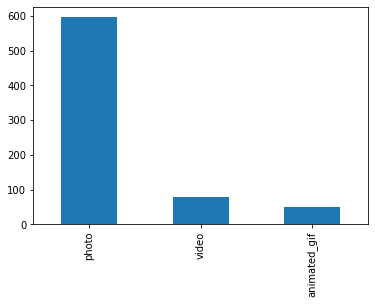

In [191]:
#Most used media
df_media_all["type"].value_counts().plot.bar()

In [131]:
df_all_no_duplicates

,entities,created_at,possibly_sensitive,author_id,id_x,conversation_id,reply_settings,public_metrics,attachments,source,lang,text,in_reply_to_user_id,referenced_tweets,context_annotations,geo,id_y,name,username
0,"{'mentions': [{'start': 200, 'end': 207, 'username': 'OpenAI', 'id': '4398626122'}], 'urls': [{'start': 272, 'end': 295, 'url': 'https://t.co/gpUCLSmEoy', 'expanded_url': 'https://twitter.com/jcantlord/status/1520835169137090563/photo/1', 'display_url': 'pic.twitter.com/gpUCLSmEoy'}], 'hashtags': [{'start': 163, 'end': 185, 'tag': 'inteligenciartificial'}, {'start': 191, 'end': 196, 'tag': 'GPT3'}, {'start': 243, 'end': 259, 'tag': 'claustrovirtual'}, {'start': 260, 'end': 271, 'tag': 'ai4schools'}]}",2022-05-01T18:38:54.000Z,False,2232144372,1520835169137090563,1520835169137090563,everyone,"{'retweet_count': 2, 'reply_count': 0, 'like_count': 6, 'quote_count': 0}",{'media_keys': ['3_1520834808284332033']},Twitter Web App,es,"¿Quieres incluir preguntas abiertas en tus clases para trabajar el pensamiento activo, pero no tienes imaginación? ¿Por qué no usar modelos generativos basados en #inteligenciartificial? Con #GPT3 de @OpenAI puedes generar material ilimitado! #claustrovirtual #ai4schools https://t.co/gpUCLSmEoy",NaN,NaN,NaN,NaN,2232144372,Javier Cantero,jcantlord
1,"{'mentions': [{'start': 0, 'end': 16, 'username': 'laTostadora_com', 'id': '86050472'}], 'hashtags': [{'start': 71, 'end': 87, 'tag': 'claustrovirtual'}]}",2022-05-01T14:15:27.000Z,False,277935088,1520768869169827840,1520650089886326785,everyone,"{'retweet_count': 0, 'reply_count': 1, 'like_count': 1, 'quote_count': 0}",NaN,Twitter for Android,es,"@laTostadora_com Pues dale, dale. Ya ves que hay muy buen rollo por el #claustrovirtual. Y camisetas del uniforme ya tienes. 😜😜",86050472,"[{'type': 'replied_to', 'id': '1520669270216216577'}]",NaN,NaN,277935088,Ingrid Mosquera,imgende
37,"{'mentions': [{'start': 129, 'end': 142, 'username': 'CUPeducation', 'id': '370158369'}], 'urls': [{'start': 144, 'end': 167, 'url': 'https://t.co/4p9LZ2Ytep', 'expanded_url': 'https://dedicatedteacher.cambridge.org/entries/', 'display_url': 'dedicatedteacher.cambridge.org/entries/', 'status': 200, 'title': 'Dedicated Teacher Awards Shortlist', 'description': 'We loved reading through and watching your inspiring teacher stories, thank you to everyone who took the time to nominate their dedicated teacher for the 2022 awards. Take a look through the eBook below to read our 60 shortlisted entries. We hope you enjoy reading them as much as we did. And to teachers everywhere; you are doing an amazing job, thank', 'unwound_url': 'https://dedicatedteacher.cambridge.org/entries/'}, {'start': 271, 'end': 294, 'url': 'https://t.co/sg0nvJ9GIZ', 'expanded_url': 'https://twitter.com/LUISDAVILABAND1/status/1520761117445959680/photo/1', 'display_url': 'pic.twitter.com/sg0nvJ9GIZ'}, {'start': 271, 'end': 294, 'url': 'https://t.co/sg0nvJ9GIZ', 'expanded_url': 'https://twitter.com/LUISDAVILABAND1/status/1520761117445959680/photo/1', 'display_url': 'pic.twitter.com/sg0nvJ9GIZ'}, {'start': 271, 'end': 294, 'url': 'https://t.co/sg0nvJ9GIZ', 'expanded_url': 'https://twitter.com/LUISDAVILABAND1/status/1520761117445959680/photo/1', 'display_url': 'pic.twitter.com/sg0nvJ9GIZ'}], 'hashtags': [{'start': 93, 'end': 125, 'tag': 'CambridgeDedicatedTeacherAwards'}, {'start': 232, 'end': 248, 'tag': 'ClaustroVirtual'}, {'start': 249, 'end': 253, 'tag': 'CD0'}, {'start': 254, 'end': 263, 'tag': 'MathTeam'}, {'start': 264, 'end': 270, 'tag': 'top60'}]}",2022-05-01T13:44:39.000Z,False,762086310735667200,1520761117445959680,1512560989241290752,everyone,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}","{'media_keys': ['3_1520761107534827521', '3_1520761111099977729', '3_1520761115306872832']}",Twitter for Android,es,"Muy emocionado y agradecido de estar en la lista de los 60 profes finalistas de los premios #CambridgeDedicatedTeacherAwards de @CUPeducation, https://t.co/4p9LZ2Ytep.

<AxesSubplot:>

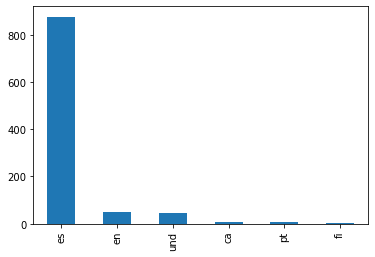

In [169]:
#Languages used in tweets
df_all_no_duplicates['lang'].value_counts().plot.bar()

<AxesSubplot:>

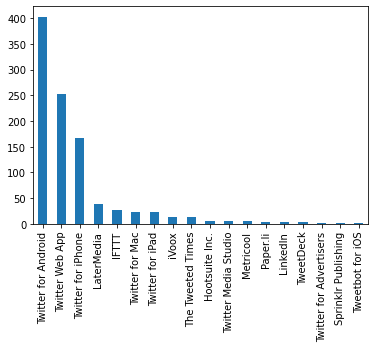

In [168]:
#Apps used to send the tweets 
df_all_no_duplicates['source'].value_counts().plot.bar()

<AxesSubplot:>

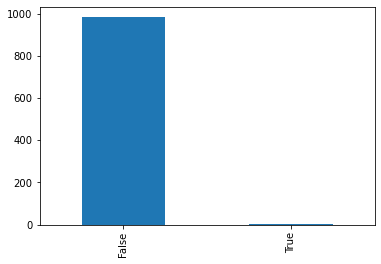

In [172]:
#Number of sensitive tweets(possibly_sensitive)
number_sensitive = df_all_no_duplicates['possibly_sensitive'].value_counts()
df_all_no_duplicates['possibly_sensitive'].value_counts().plot.bar()


In [365]:
#Here we see there is just one "sensitive" tweet
#It would be nice to display the sensitive tweet
#df_all_no_duplicates[df_all_no_duplicates['possibly_sensitive']=='False']



,entities,created_at,possibly_sensitive,author_id,id_x,conversation_id,reply_settings,public_metrics,attachments,source,...,text,in_reply_to_user_id,referenced_tweets,context_annotations,geo,id_y,name,username,like_count,reply_count


In [177]:
#Number of tweets open to whole Twitter(reply_settings)
df_all_no_duplicates['reply_settings'].value_counts()

everyone     980
following      5
Name: reply_settings, dtype: int64

<AxesSubplot:>

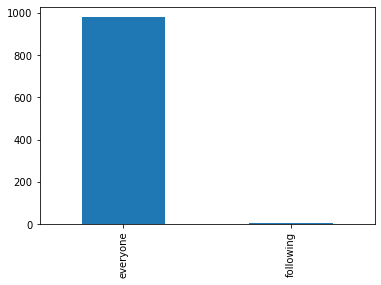

In [178]:
df_all_no_duplicates['reply_settings'].value_counts().plot.bar()

In [352]:
#Data export
df_all.to_csv("test_table.csv", encoding="utf-8")